In [ ]:
import time
import copy
import glob

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision import datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def make_weights_for_balanced_classes(images, nclasses):                        
    count = [0] * nclasses                                                      
    for item in images:                                                         
        count[item[1]] += 1                                                     
    weight_per_class = [0.] * nclasses                                      
    N = float(sum(count))                                                   
    for i in range(nclasses):                                                   
        weight_per_class[i] = N/float(count[i])                                 
    weight = [0] * len(images)                                              
    for idx, val in enumerate(images):                                          
        weight[idx] = weight_per_class[val[1]]                                  
    return weight   

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation

transform = transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

data_dir = '/content/drive/MyDrive/BreastCancerProj'
train_dataset = torchvision.datasets.ImageFolder(data_dir, transform)

# For unbalanced dataset we create a weighted sampler                       
weights = make_weights_for_balanced_classes(train_dataset.imgs,5)                                                                
weights = torch.DoubleTensor(weights)                                       
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights))                     
                                                                                

train_loader = DataLoader(train_dataset, batch_size=32,  num_workers=5,sampler = sampler, pin_memory=True)

dataset_size = len(train_dataset)
class_names = train_dataset.classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# # Data augmentation and normalization for training
# # Just normalization for validation
# from torch.utils.data import Subset
# from sklearn.model_selection import train_test_split

# transform = transforms.Compose([
#             transforms.RandomResizedCrop(224),
#             transforms.RandomHorizontalFlip(),
#             transforms.ToTensor(),
#             transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

# data_dir = '/content/drive/MyDrive/BreastCancerProj'
# def train_val_dataset(dataset, val_split=0.25):
#     train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
#     datasets = {}
#     datasets['train'] = Subset(dataset, train_idx)
#     datasets['val'] = Subset(dataset, val_idx)
#     return datasets

# dataset = torchvision.datasets.ImageFolder(data_dir, transform=transform)
# print(len(dataset))
# datasets = train_val_dataset(dataset)
# print(len(datasets['train']))
# print(len(datasets['val']))
# # The original dataset is available in the Subset class
# print(datasets['train'].dataset)

# # For unbalanced dataset we create a weighted sampler                       
# weights = make_weights_for_balanced_classes(dataset.imgs,5)                                                                
# weights = torch.DoubleTensor(weights)                                       
# sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights))                                         
# dataloaders = {x: torch.utils.data.DataLoader(datasets[x], batch_size=4,
#                                              sampler = sampler, pin_memory=True, num_workers=5)
#               for x in ['train', 'val']}
# dataset_sizes = {x: len(datasets[x]) for x in ['train', 'val']}

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

7227
5420
1807
Dataset ImageFolder
    Number of datapoints: 7227
    Root location: /content/drive/MyDrive/BreastCancerProj
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 3, 224, 224])
tensor(0)


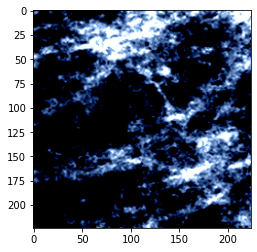

In [ ]:
batch = next(iter(train_loader))
print(batch[0].shape)
plt.imshow(batch[0][0].permute(1, 2, 0))
print(batch[1][0])


In [ ]:
vgg16 = models.vgg16(pretrained=True)

In [ ]:
resnet18 = models.resnet18(pretrained=True)

In [ ]:
squeezenet = models.squeezenet1_0(pretrained=True)

In [ ]:
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for inputs, labels in train_loader:
  print('l',labels)
  print('inp', inputs)

Показано результат, скорочений до останніх рядків (5000).
          [-0.1138, -0.1312, -0.1661,  ...,  0.7402,  0.6356,  0.5659]]],


        [[[-0.9363, -1.1418, -1.3302,  ..., -0.0801, -0.2171, -0.2342],
          [-1.0048, -1.2274, -1.2103,  ..., -0.0801, -0.3883, -0.1486],
          [-1.2274, -1.3473, -1.2617,  ..., -0.1828, -0.2513, -0.3027],
          ...,
          [ 0.5022,  0.5193,  0.4851,  ..., -0.2856, -0.3883, -0.1143],
          [ 0.4337,  0.2111,  0.2967,  ..., -0.3712, -0.4054, -0.3883],
          [ 0.4166,  0.2111,  0.5022,  ...,  0.1083, -0.0972, -0.2684]],

         [[-0.8277, -1.0378, -1.2304,  ...,  0.0476, -0.0924, -0.1099],
          [-0.8978, -1.1253, -1.1078,  ...,  0.0476, -0.2675, -0.0224],
          [-1.1253, -1.2479, -1.1604,  ..., -0.0574, -0.1275, -0.1800],
          ...,
          [ 0.6429,  0.6604,  0.6254,  ..., -0.1625, -0.2675,  0.0126],
          [ 0.5728,  0.3452,  0.4328,  ..., -0.2500, -0.2850, -0.2675],
          [ 0.5553,  0.3452,  0.6429,  ...

# # Feature Extracting a Pretrained Model

Since this pretrained model is trained on ImageNet dataset, the output layers has 1000 nodes. We want to reshape this last classifier layer to fit this dataset which has 2 classes. Furthermore, in feature extracting, we don't need to calculate gradient for any layers except the last layer that we initialize. For this we need to set `.requires_grad` to `False`

In [ ]:
def set_parameter_requires_grad(model, feature_extracting=True):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = True
            
set_parameter_requires_grad(vgg16)

In [ ]:
vgg16.fc = nn.Linear(4096, 5)

In [ ]:
# Initialize new output layer
resnet18.fc = nn.Linear(512, 5)

In [ ]:
for name, param in vgg16.named_parameters():
    if param.requires_grad:
        print(name, param.data)

features.0.weight tensor([[[[-5.5373e-01,  1.4270e-01,  5.2896e-01],
          [-5.8312e-01,  3.5655e-01,  7.6566e-01],
          [-6.9022e-01, -4.8019e-02,  4.8409e-01]],

         [[ 1.7548e-01,  9.8630e-03, -8.1413e-02],
          [ 4.4089e-02, -7.0323e-02, -2.6035e-01],
          [ 1.3239e-01, -1.7279e-01, -1.3226e-01]],

         [[ 3.1303e-01, -1.6591e-01, -4.2752e-01],
          [ 4.7519e-01, -8.2677e-02, -4.8700e-01],
          [ 6.3203e-01,  1.9308e-02, -2.7753e-01]]],


        [[[ 2.3254e-01,  1.2666e-01,  1.8605e-01],
          [-4.2805e-01, -2.4349e-01,  2.4628e-01],
          [-2.5066e-01,  1.4177e-01, -5.4864e-03]],

         [[-1.4076e-01, -2.1903e-01,  1.5041e-01],
          [-8.4127e-01, -3.5176e-01,  5.6398e-01],
          [-2.4194e-01,  5.1928e-01,  5.3915e-01]],

         [[-3.1432e-01, -3.7048e-01, -1.3094e-01],
          [-4.7144e-01, -1.5503e-01,  3.4589e-01],
          [ 5.4384e-02,  5.8683e-01,  4.9580e-01]]],


        [[[ 1.7715e-01,  5.2149e-01,  9.8740e-03

In [ ]:
# Check which layer in the model that will compute the gradient
for name, param in resnet18.named_parameters():
    if param.requires_grad:
        print(name, param.data)

conv1.weight tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
            1.7083e-02, -1.2694e-02],
          [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
           -1.2907e-01,  3.7424e-03],
          [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
            2.5632e-01,  6.3573e-02],
          ...,
          [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
           -4.2058e-01, -2.5781e-01],
          [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
            3.9359e-01,  1.6606e-01],
          [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
           -8.2230e-02, -5.7828e-03]],

         [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
            6.6221e-04, -2.5743e-02],
          [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
           -1.6051e-01, -1.2826e-03],
          [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,
            3.6887e-01,  1.2455e-01],
       

In [ ]:

from sklearn.metrics import confusion_matrix
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=50, is_train=True):
    since = time.time()
    
    acc_history = []
    loss_history = []
    conf_history = []

    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        model.train()
        running_loss = 0.0
        running_corrects = 0
        # Initialize the prediction and label lists(tensors)
        predlist=torch.zeros(0,dtype=torch.long, device='cpu')
        lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
        # Iterate over data.
        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)
            model.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            with torch.set_grad_enabled(True):
              outputs = model(inputs)
              loss = criterion(outputs, labels)

              _, preds = torch.max(outputs, 1)
              predlist=torch.cat([predlist,preds.view(-1).cpu()])
              lbllist=torch.cat([lbllist,labels.view(-1).cpu()])
            # backward
              loss.backward()
              optimizer.step()

            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(dataloaders.dataset)
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)

          # Confusion matrix
        conf_mat=confusion_matrix(lbllist.numpy(), predlist.numpy())
        print('conf_mat')
        print(conf_mat)

        # Per-class accuracy
        class_accuracy = 100*conf_mat.diagonal()/conf_mat.sum(1)
        print('class')
        print(class_accuracy)
        
        print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

        if epoch_acc > best_acc:
            best_acc = epoch_acc
        conf_history.append(conf_mat)
        acc_history.append(epoch_acc.item())
        loss_history.append(epoch_loss)
        
        #torch.save(model.state_dict(), os.path.join('drive/MyDrive/data/model/', '{0:0=2d}.pth'.format(epoch)))

        print()


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))
    
    return acc_history, loss_history, conf_history

In [ ]:
params_to_update = []
for name,param in vgg16.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)
            
optimizer = optim.Adam(params_to_update)

	 features.0.weight
	 features.0.bias
	 features.2.weight
	 features.2.bias
	 features.5.weight
	 features.5.bias
	 features.7.weight
	 features.7.bias
	 features.10.weight
	 features.10.bias
	 features.12.weight
	 features.12.bias
	 features.14.weight
	 features.14.bias
	 features.17.weight
	 features.17.bias
	 features.19.weight
	 features.19.bias
	 features.21.weight
	 features.21.bias
	 features.24.weight
	 features.24.bias
	 features.26.weight
	 features.26.bias
	 features.28.weight
	 features.28.bias
	 classifier.0.weight
	 classifier.0.bias
	 classifier.3.weight
	 classifier.3.bias
	 classifier.6.weight
	 classifier.6.bias
	 fc.weight
	 fc.bias


In [ ]:
# Here we only want to update the gradient for the classifier layer that we initialized.
params_to_update = []
for name,param in resnet18.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)
            
optimizer = optim.Adam(params_to_update)

	 conv1.weight
	 bn1.weight
	 bn1.bias
	 layer1.0.conv1.weight
	 layer1.0.bn1.weight
	 layer1.0.bn1.bias
	 layer1.0.conv2.weight
	 layer1.0.bn2.weight
	 layer1.0.bn2.bias
	 layer1.1.conv1.weight
	 layer1.1.bn1.weight
	 layer1.1.bn1.bias
	 layer1.1.conv2.weight
	 layer1.1.bn2.weight
	 layer1.1.bn2.bias
	 layer2.0.conv1.weight
	 layer2.0.bn1.weight
	 layer2.0.bn1.bias
	 layer2.0.conv2.weight
	 layer2.0.bn2.weight
	 layer2.0.bn2.bias
	 layer2.0.downsample.0.weight
	 layer2.0.downsample.1.weight
	 layer2.0.downsample.1.bias
	 layer2.1.conv1.weight
	 layer2.1.bn1.weight
	 layer2.1.bn1.bias
	 layer2.1.conv2.weight
	 layer2.1.bn2.weight
	 layer2.1.bn2.bias
	 layer3.0.conv1.weight
	 layer3.0.bn1.weight
	 layer3.0.bn1.bias
	 layer3.0.conv2.weight
	 layer3.0.bn2.weight
	 layer3.0.bn2.bias
	 layer3.0.downsample.0.weight
	 layer3.0.downsample.1.weight
	 layer3.0.downsample.1.bias
	 layer3.1.conv1.weight
	 layer3.1.bn1.weight
	 layer3.1.bn1.bias
	 layer3.1.conv2.weight
	 layer3.1.bn2.weight
	 layer

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Setup the loss function
criterion = nn.CrossEntropyLoss()

# Train model
train_acc_hist, train_loss_hist = train_model(vgg16, train_loader, criterion, optimizer, device)

In [ ]:
for inputs, labels in dataloaders.dataset['train']:
  print(labels)

AttributeError: ignored

In [ ]:
# from torch.optim import lr_scheduler
# def train_model(model,dataloaders, criterion, optimizer, scheduler,device, num_epochs=50):
#     since = time.time()

#     best_model_wts = copy.deepcopy(model.state_dict())
#     best_acc = 0.0

#     for epoch in range(num_epochs):
#         print('Epoch {}/{}'.format(epoch, num_epochs - 1))
#         print('-' * 10)

#         # Each epoch has a training and validation phase
#         for phase in ['train', 'val']:
#             if phase == 'train':
#                 model.train()  # Set model to training mode
#             else:
#                 model.eval()   # Set model to evaluate mode

#             running_loss = 0.0
#             running_corrects = 0

#             # Iterate over data.
#             for inputs, labels in dataloaders[phase]:
#                 inputs = inputs.to(device)
#                 labels = labels.to(device)

#                 # zero the parameter gradients
#                 optimizer.zero_grad()

#                 # forward
#                 # track history if only in train
#                 with torch.set_grad_enabled(phase == 'train'):
#                     outputs = model(inputs)
#                     _, preds = torch.max(outputs, 1)
#                     loss = criterion(outputs, labels)

#                     # backward + optimize only if in training phase
#                     if phase == 'train':
#                         loss.backward()
#                         optimizer.step()

#                 # statistics
#                 running_loss += loss.item() * inputs.size(0)
#                 running_corrects += torch.sum(preds == labels.data)
#             if phase == 'train':
#                 scheduler.step()

#             epoch_loss = running_loss / dataset_sizes[phase]
#             epoch_acc = running_corrects.double() / dataset_sizes[phase]

#             print('{} Loss: {:.4f} Acc: {:.4f}'.format(
#                 phase, epoch_loss, epoch_acc))

#             # deep copy the model
#             if phase == 'val' and epoch_acc > best_acc:
#                 best_acc = epoch_acc
#                 best_model_wts = copy.deepcopy(model.state_dict())

#         print()

#     time_elapsed = time.time() - since
#     print('Training complete in {:.0f}m {:.0f}s'.format(
#         time_elapsed // 60, time_elapsed % 60))
#     print('Best val Acc: {:4f}'.format(best_acc))

#     # load best model weights
#     model.load_state_dict(best_model_wts)
#     return model
# optimizer_ft = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)

# # Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
# model_ft = train_model(resnet18,dataloaders, criterion, optimizer,exp_lr_scheduler,device)

Epoch 0/49
----------


IndexError: ignored

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Setup the loss function
criterion = nn.CrossEntropyLoss()

# Train model
train_acc_hist, train_loss_hist, conf_mat = train_model(resnet18, train_loader, criterion, optimizer,device)

Epoch 0/49
----------
conf_mat
[[788 266  57 221 100]
 [337 633  75 321  83]
 [203 115 551 177 377]
 [157 314  74 723 193]
 [204 115 247 277 619]]
class
[55.02793296 43.68530021 38.72101195 49.48665298 42.33926129]
Loss: 1.3113 Acc: 0.4586

Epoch 1/49
----------
conf_mat
[[944 249  42 170  73]
 [280 765  60 291  50]
 [172 113 688 154 337]
 [135 305  60 815 148]
 [167 108 285 226 590]]
class
[63.87009472 52.90456432 46.99453552 55.70745044 42.87790698]
Loss: 1.1749 Acc: 0.5261

Epoch 2/49
----------
conf_mat
[[920 202  51 148  83]
 [197 894  56 278  47]
 [175 134 706 117 368]
 [106 299  63 789 160]
 [162  98 296 185 693]]
class
[65.52706553 60.73369565 47.06666667 55.68101623 48.32635983]
Loss: 1.0983 Acc: 0.5538

Epoch 3/49
----------
conf_mat
[[1052  201   42  125   78]
 [ 208  879   46  239   61]
 [ 174  114  677   98  381]
 [ 116  254   57  838  149]
 [ 169   80  262  198  729]]
class
[70.22696929 61.33984648 46.88365651 59.26449788 50.69541029]
Loss: 1.0319 Acc: 0.5777

Epoch 4/49


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(sum(conf_mat), ['Normal','Benign Mass','Benign Calcification','Malignant Mass','Malignant Calcification'])

In [ ]:
test_path = '/content/drive/MyDrive/test'
transform = transforms.Compose(
                [
                    transforms.Resize(224),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
                ])
test_dataset = torchvision.datasets.ImageFolder(
    root=test_path,
    transform=transform
)
# test_loader = torch.utils.data.DataLoader(
#     test_dataset,
#     batch_size=32,
#     num_workers=5,
#     shuffle=True
# )
weights = make_weights_for_balanced_classes(test_dataset.imgs,5)                                                                
weights = torch.DoubleTensor(weights)                                       
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights))                     
                                                                                

test_loader = DataLoader(test_dataset, batch_size=32,  num_workers=5,sampler = sampler, pin_memory=True)

print(len(test_loader))

In [ ]:
def eval_model(model, dataloaders, device):
    since = time.time()
    
    acc_history = []
    best_acc = 0.0

    model.eval()
    model.to(device)

    running_corrects = 0
    predlist=torch.zeros(0,dtype=torch.long, device='cpu')
    lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
        # Iterate over data.
    for inputs, labels in dataloaders:
      
      inputs = inputs.to(device)
      labels = labels.to(device)
      with torch.no_grad():
        outputs = model(inputs)

      _, preds = torch.max(outputs, 1)
      running_corrects += torch.sum(preds == labels.data)
      inds= torch.where(preds != labels.data)
      inds = inds[0].tolist()
      print(inds)
      for i in inds:
        print('Predicted:', preds[i].item())
        print('Labels:', labels.data[i].item())
        plt.imshow(inputs.cpu()[i].permute(1, 2,0))
        plt.show()
      predlist=torch.cat([predlist,preds.view(-1).cpu()])
      lbllist=torch.cat([lbllist,labels.view(-1).cpu()])
    epoch_acc = running_corrects.double() / len(dataloaders.dataset)
    conf_mat=confusion_matrix(lbllist.numpy(), predlist.numpy())
    print('conf_mat')
    print(conf_mat)

        # Per-class accuracy
    class_accuracy = 100*conf_mat.diagonal()/conf_mat.sum(1)
    print('class')
    print(class_accuracy)
    print('Acc: {:.4f}'.format(epoch_acc))
        
    if epoch_acc > best_acc:
        best_acc = epoch_acc

    acc_history.append(epoch_acc.item())

    print()

    time_elapsed = time.time() - since
    print('Validation complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))
    
    return acc_history

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15]
Predicted: 4
Labels: 3


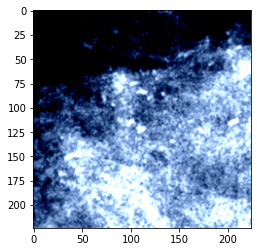

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3, 9, 17]
Predicted: 2
Labels: 4


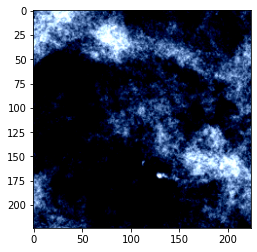

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted: 2
Labels: 4


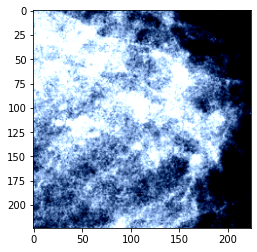

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted: 4
Labels: 3


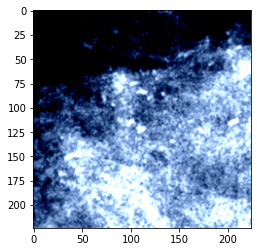

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4, 16, 23]
Predicted: 2
Labels: 4


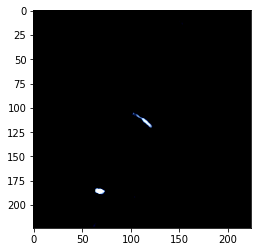

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted: 2
Labels: 4


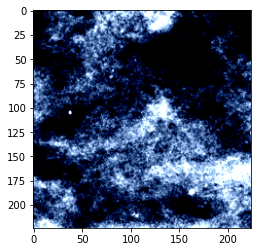

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted: 4
Labels: 3


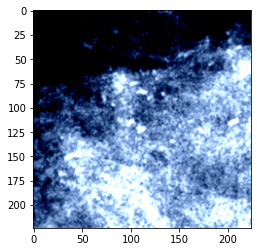

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1, 2, 5, 22, 30]
Predicted: 4
Labels: 0


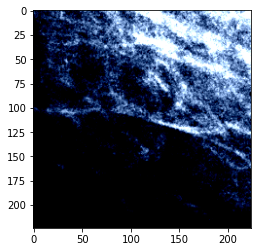

Predicted: 2
Labels: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


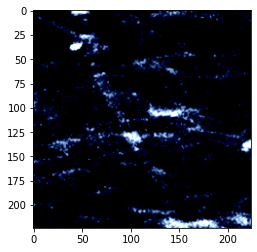

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted: 2
Labels: 4


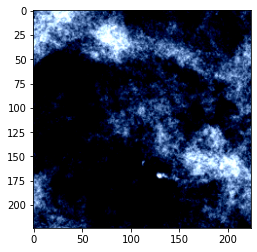

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted: 4
Labels: 0


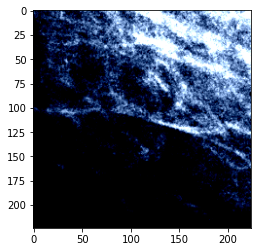

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted: 2
Labels: 4


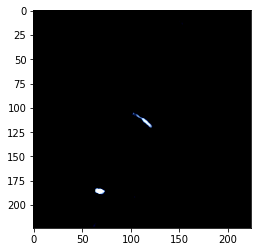

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29]
Predicted: 4
Labels: 3


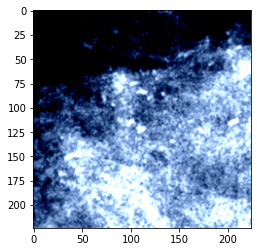

conf_mat
[[20  0  0  0  2]
 [ 0 39  0  0  0]
 [ 0  0 35  0  0]
 [ 0  0  0 29  4]
 [ 0  0  7  0 24]]
class
[ 90.90909091 100.         100.          87.87878788  77.41935484]
Acc: 0.9188

Validation complete in 0m 4s
Best Acc: 0.918750


In [ ]:
val_acc_hist = eval_model(resnet18, test_loader, device)

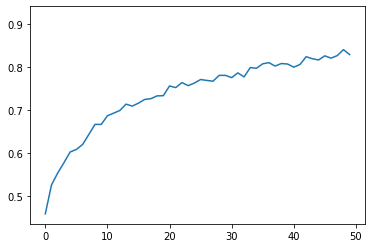

In [ ]:
plt.plot(train_acc_hist)
plt.plot(val_acc_hist)
plt.show()

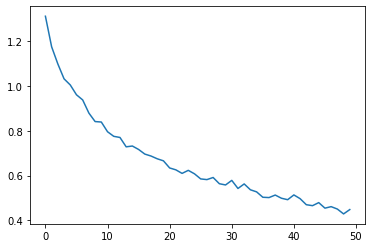

In [ ]:
plt.plot(train_loss_hist)
plt.show()